*Importing the Libraries*

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, r2_score
from sklearn import metrics

*Importing the Dataset*

In [95]:
dataset = pd.read_csv('/content/movie_metadata.csv')
pd.set_option('display.max_columns', None)
dataset

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [96]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [97]:
dataset.shape

(5043, 28)

*Checking how many null value present in each column which have to be imputed*

In [98]:
dataset.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

*Checking the minimum, maximum values as well as mean and standard deviation*

In [99]:
dataset.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


*Counting numbers of movies in each language*

In [100]:
dataset['language'].value_counts()

English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Cantonese       11
Russian         11
Italian         11
Portuguese       8
Korean           8
Arabic           5
Danish           5
Hebrew           5
Swedish          5
Polish           4
Norwegian        4
Persian          4
Dutch            4
Thai             3
Chinese          3
Icelandic        2
None             2
Indonesian       2
Aboriginal       2
Romanian         2
Dari             2
Zulu             2
Panjabi          1
Urdu             1
Vietnamese       1
Slovenian        1
Greek            1
Dzongkha         1
Tamil            1
Telugu           1
Kannada          1
Czech            1
Hungarian        1
Bosnian          1
Filipino         1
Mongolian        1
Maya             1
Aramaic          1
Kazakh           1
Swahili          1
Name: language, dtype: int64

*Saving English Movies into a different dataframe for further analysis*

In [101]:
eng_dataset = dataset[dataset.language == 'English']
eng_dataset

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


*Storing movies with imdb score equal to 6 or above 6*

In [102]:
score = eng_dataset.imdb_score[eng_dataset.imdb_score>=6]
score

0       7.9
1       7.1
2       6.8
3       8.5
5       6.6
       ... 
5038    7.7
5039    7.5
5040    6.3
5041    6.3
5042    6.6
Name: imdb_score, Length: 3292, dtype: float64

*Storing movie_titles with imdb score equal to 6 or above 6*

In [103]:
name = eng_dataset.movie_title[eng_dataset.imdb_score>=6]
name

0                                         Avatar 
1       Pirates of the Caribbean: At World's End 
2                                        Spectre 
3                          The Dark Knight Rises 
5                                    John Carter 
                          ...                    
5038                     Signed Sealed Delivered 
5039                   The Following             
5040                        A Plague So Pleasant 
5041                            Shanghai Calling 
5042                           My Date with Drew 
Name: movie_title, Length: 3292, dtype: object

*Storing movie genre with imdb score equal to 6 or above 6*



In [104]:
genres = eng_dataset.genres[eng_dataset.imdb_score>=6]
genres

0       Action|Adventure|Fantasy|Sci-Fi
1              Action|Adventure|Fantasy
2             Action|Adventure|Thriller
3                       Action|Thriller
5               Action|Adventure|Sci-Fi
                     ...               
5038                       Comedy|Drama
5039       Crime|Drama|Mystery|Thriller
5040              Drama|Horror|Thriller
5041               Comedy|Drama|Romance
5042                        Documentary
Name: genres, Length: 3292, dtype: object

*Creating a dataframe with score, name and genre of english movies*

In [105]:
english_movies = pd.concat([name,genres,score],axis=1)
english_movies

,movie_title,genres,imdb_score
0,Avatar,Action|Adventure|Fantasy|Sci-Fi,7.9
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,7.1
2,Spectre,Action|Adventure|Thriller,6.8
3,The Dark Knight Rises,Action|Thriller,8.5
5,John Carter,Action|Adventure|Sci-Fi,6.6
...,...,...,...
5038,Signed Sealed Delivered,Comedy|Drama,7.7
5039,The Following,Crime|Drama|Mystery|Thriller,7.5
5040,A Plague So Pleasant,Drama|Horror|Thriller,6.3
5041,Shanghai Calling,Comedy|Drama|Romance,6.3


***Data visualization***

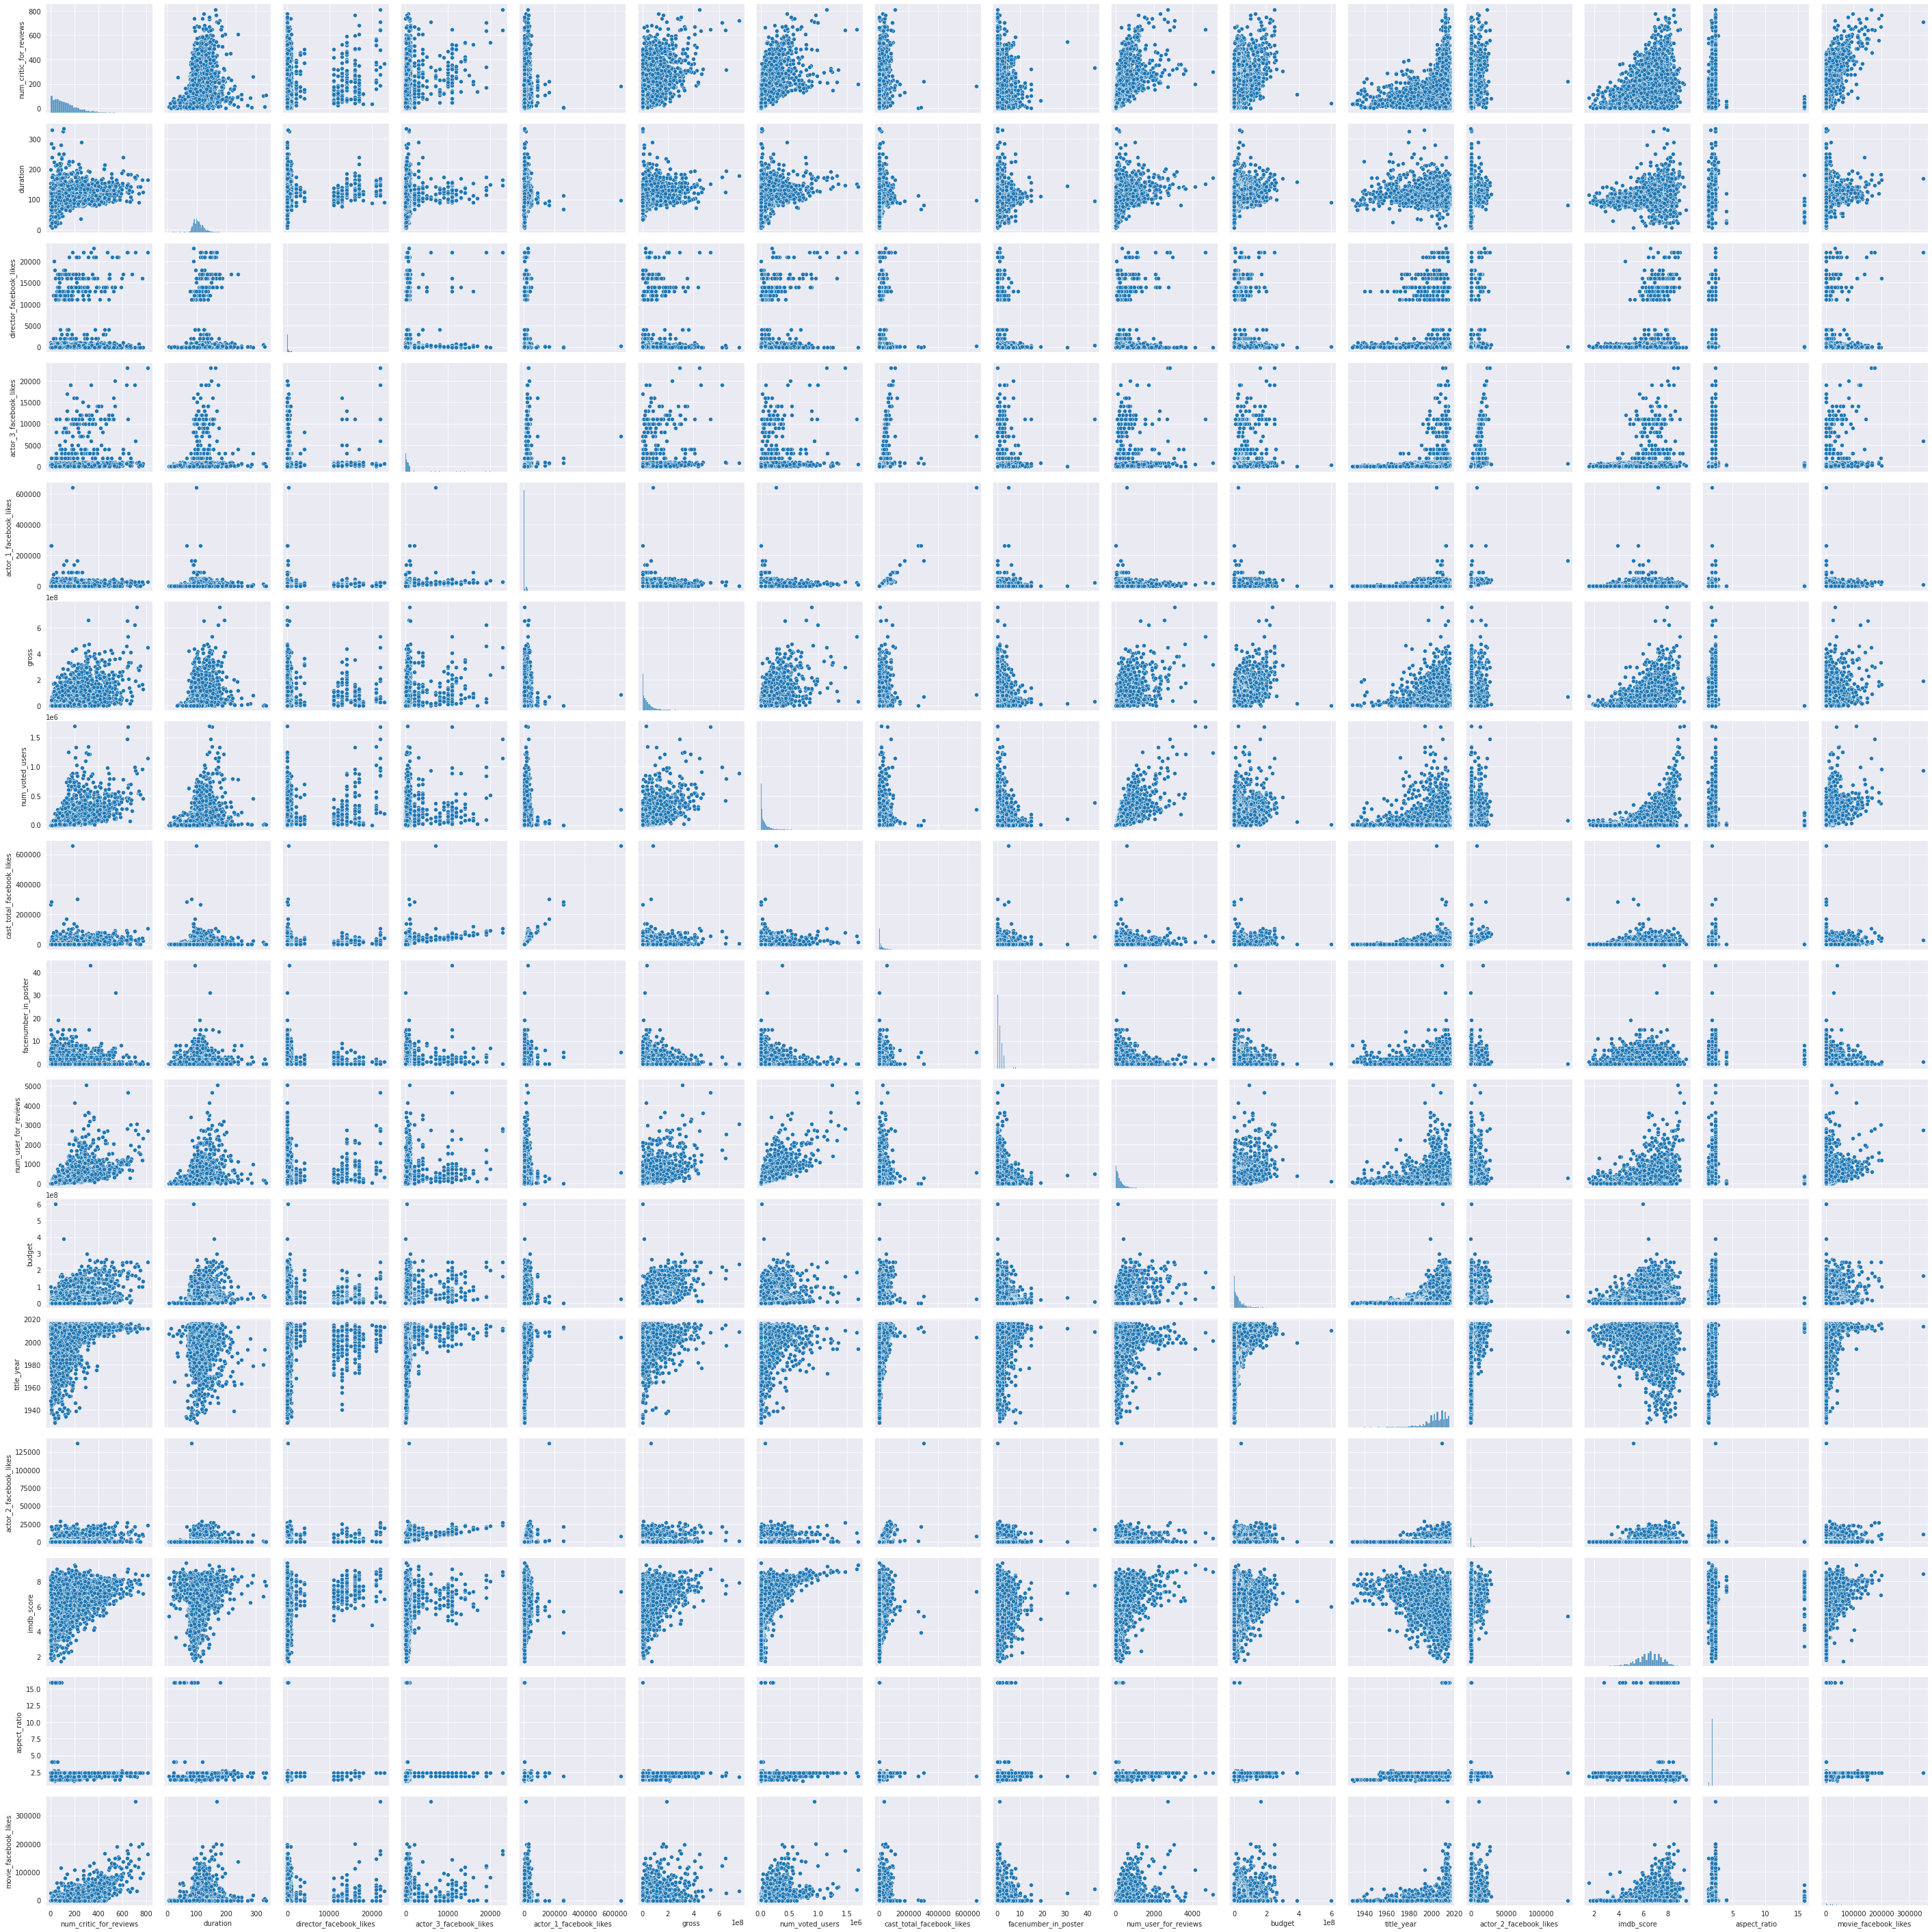

In [106]:
sns.pairplot(data = eng_dataset)

*Pie plot for english movies*

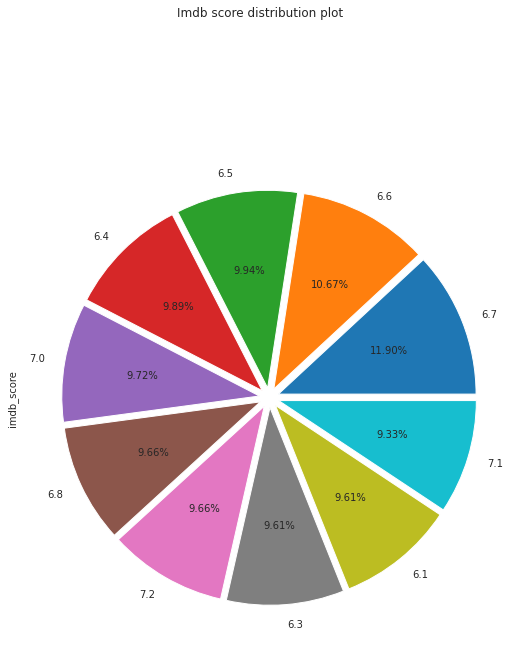

In [107]:
f,ax=plt.subplots(figsize=(10,20)) 
ax1=plt.subplot(211)
f.suptitle("Imdb score distribution plot")
explode=(0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)
eng_dataset['imdb_score'].value_counts(ascending=False).head(10).plot(kind='pie',autopct="%0.2f%%",explode=explode,ax=ax1)

*Distribution plot for all prices*

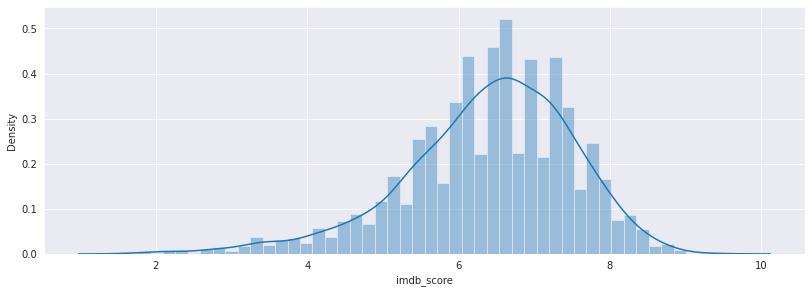

In [108]:
f,ax=plt.subplots(figsize=(30,10))
ax3=plt.subplot(224)
sns.distplot(eng_dataset['imdb_score'],ax=ax3)

*Visualizing the directors names present in the dataset*

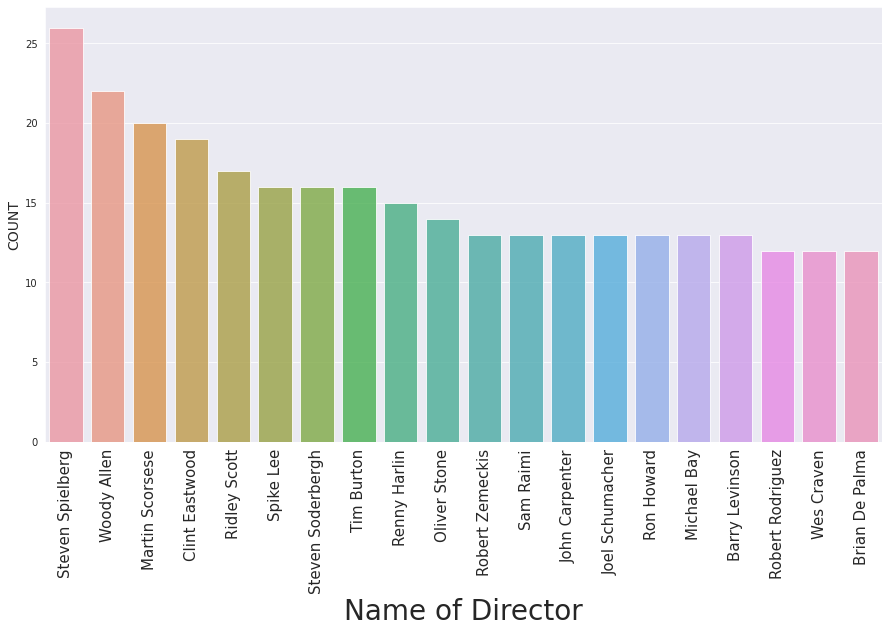

In [109]:
sns.set_style("darkgrid")
ls = eng_dataset['director_name'].value_counts().head(20).sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp =sns.barplot(ls.index, ls.values, alpha=0.8)
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('Name of Director', fontsize=28)
temp.set_xticklabels(rotation=90,labels=ls.index,fontsize=15)
plt.show()

*Visualizing the the barplot of contries and the imdb score*

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

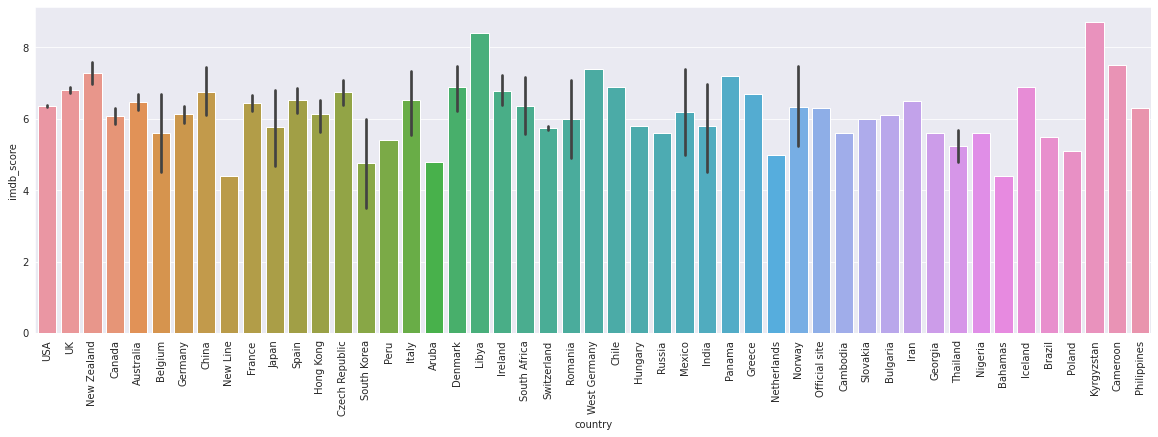

In [111]:
plt.figure(figsize=(20, 6))
sns.barplot(x='country',y='imdb_score',data=eng_dataset);
plt.xticks(rotation=90)

*Visualization of the type of content having higher imdb score and the type of movie color present in data*

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

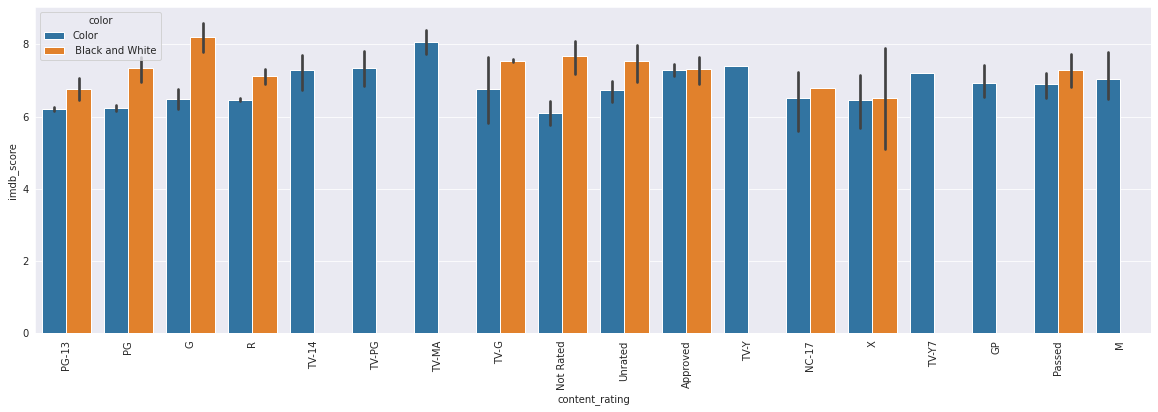

In [113]:
plt.figure(figsize=(20, 6))
sns.barplot(x='content_rating',y='imdb_score',hue='color',data=eng_dataset);
plt.xticks(rotation=90)

*Visualization of the type of content rating on X-axis having aspect ratio on Y-axis*

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

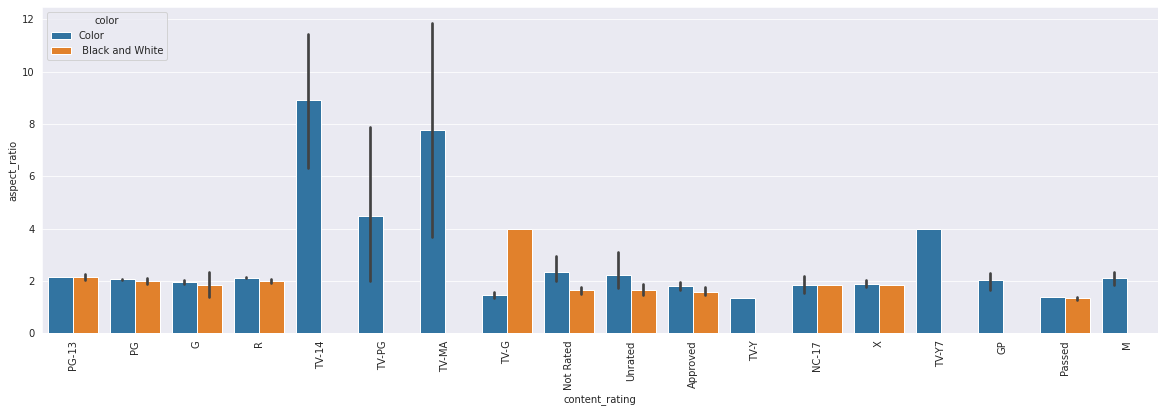

In [114]:
plt.figure(figsize=(20, 6))
sns.barplot(x='content_rating',y='aspect_ratio',hue='color',data=eng_dataset);
plt.xticks(rotation=90)

*Visualization of the aspect ratio and its imdb score with hue as the color column*

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

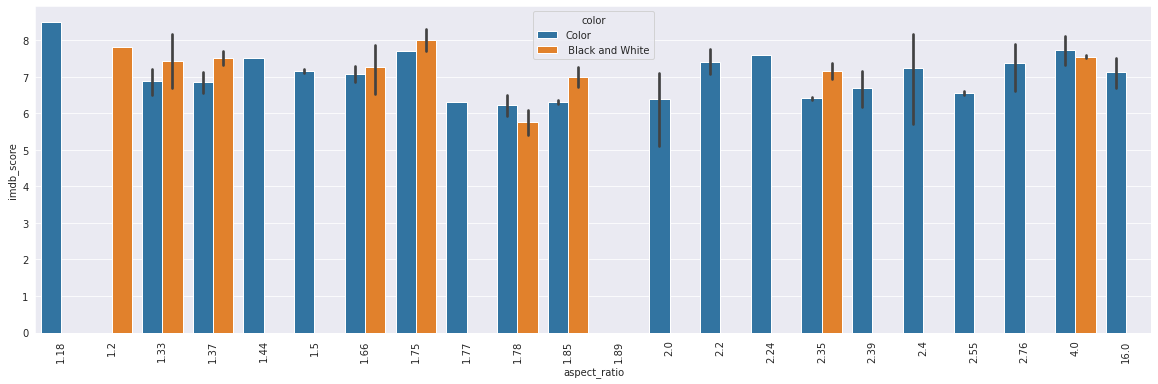

In [115]:
plt.figure(figsize=(20, 6))
sns.barplot(x='aspect_ratio',y='imdb_score',hue='color',data=eng_dataset);
plt.xticks(rotation=90)

*Removing Null values*

In [116]:
eng_dataset = eng_dataset.dropna()
eng_dataset.isnull().sum()
eng_dataset.columns
eng_dataset = eng_dataset.drop(columns=['movie_imdb_link','color','movie_title','facenumber_in_poster', 'plot_keywords',
                    'actor_3_name','movie_imdb_link','aspect_ratio','language'])
eng_dataset

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,4834,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,471220,48350,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,275868,11700,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,1144337,106759,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,212204,1873,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5012,David Ayer,233.0,109.0,453.0,120.0,Martin Donovan,1000.0,10499968.0,Action|Crime|Drama|Thriller,Mireille Enos,47502,1458,212.0,USA,R,35000000.0,2014.0,206.0,5.7,10000
5015,Richard Linklater,61.0,100.0,0.0,0.0,Richard Linklater,5.0,1227508.0,Comedy|Drama,Tommy Pallotta,15103,5,80.0,USA,R,23000.0,1991.0,0.0,7.1,2000
5025,John Waters,73.0,108.0,0.0,105.0,Mink Stole,462.0,180483.0,Comedy|Crime|Horror,Divine,16792,760,183.0,USA,NC-17,10000.0,1972.0,143.0,6.1,0
5033,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,72639,368,371.0,USA,PG-13,7000.0,2004.0,45.0,7.0,19000


In [117]:
eng_dataset.shape

(3598, 20)

*Label Encoding Categorical data*

In [118]:
cat_columns=['content_rating','director_name','genres','actor_1_name','actor_2_name','country']
le=LabelEncoder()
for i in cat_columns:
    eng_dataset[i]=le.fit_transform(eng_dataset[i])
eng_dataset.dtypes

director_name                  int64
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                   int64
actor_1_facebook_likes       float64
gross                        float64
genres                         int64
actor_1_name                   int64
num_voted_users                int64
cast_total_facebook_likes      int64
num_user_for_reviews         float64
country                        int64
content_rating                 int64
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
movie_facebook_likes           int64
dtype: object

*Distribution Plot*

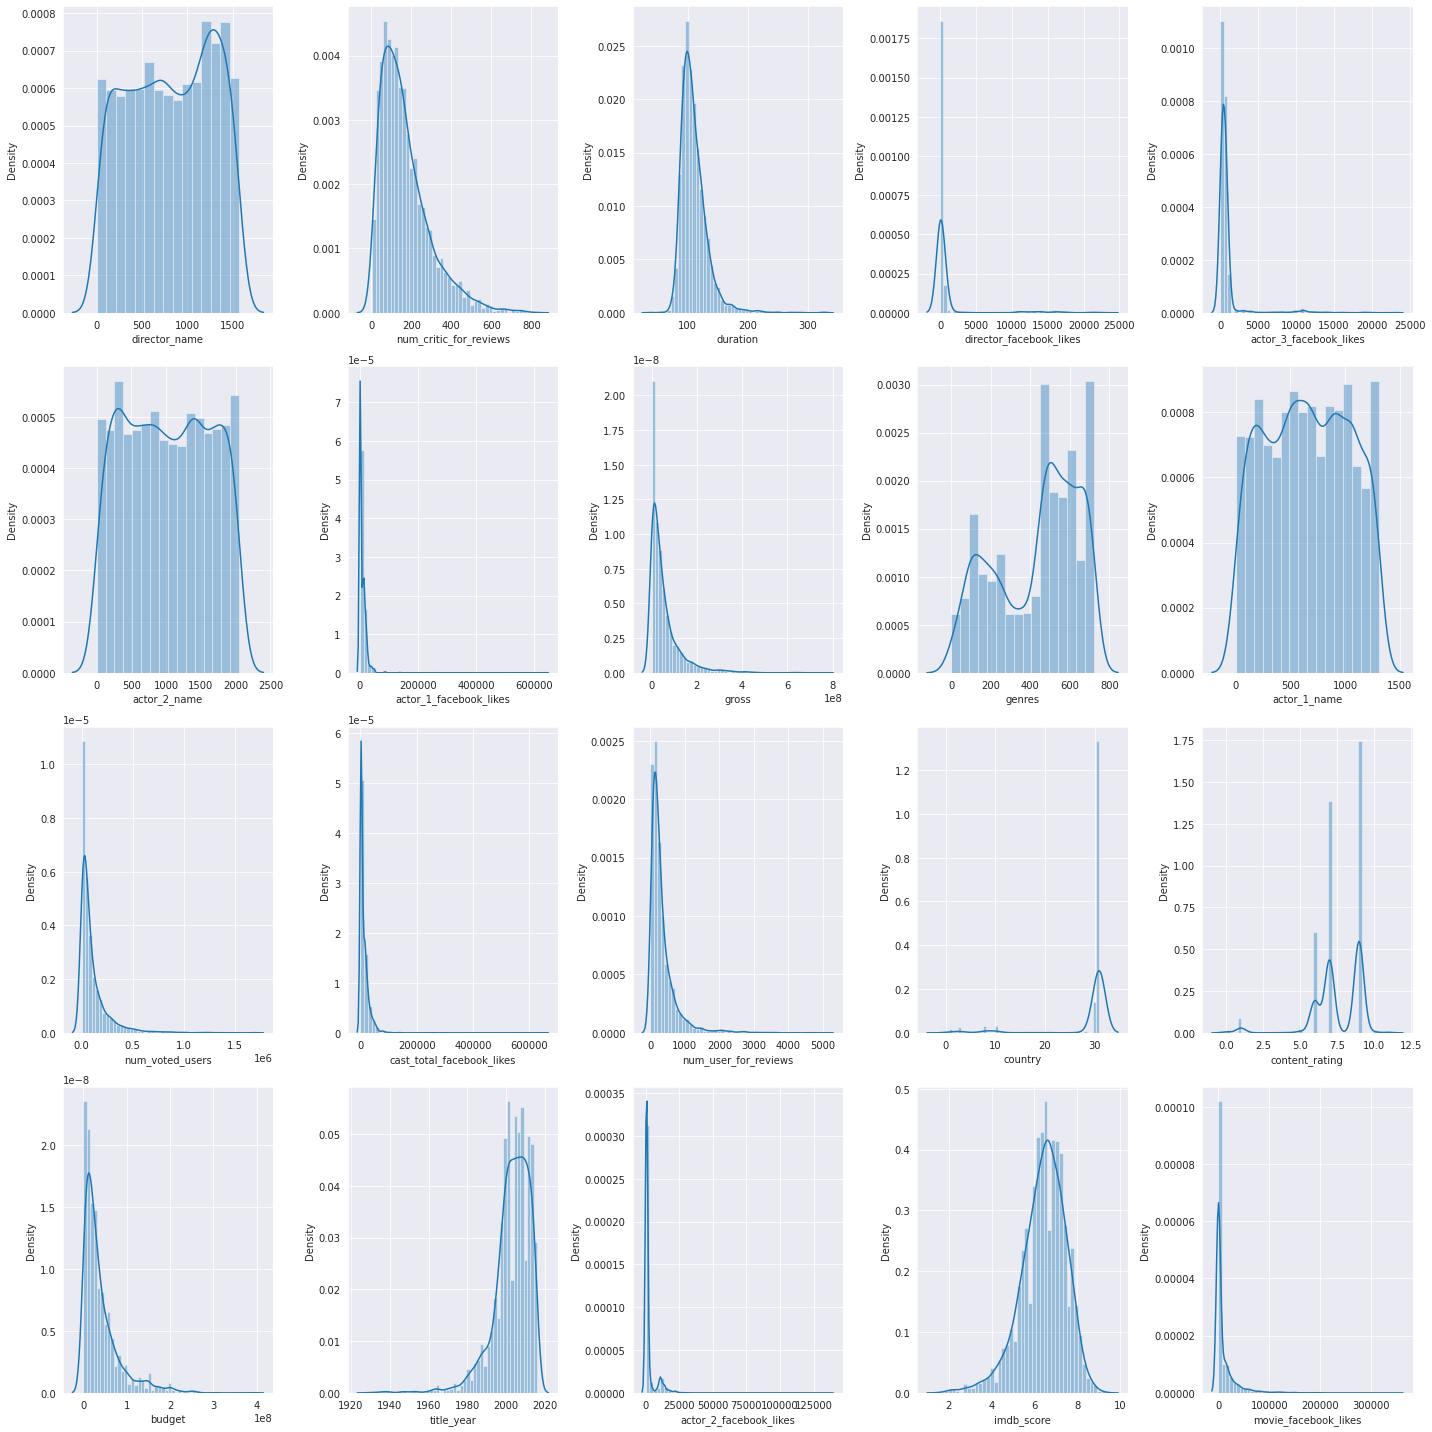

In [119]:
rows=4
cols=5
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,20))
col=eng_dataset.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(eng_dataset[col[index]],ax=ax[i][j])
        index=index+1
        
plt.tight_layout()

***Log Transformation***

In [120]:
eng_dataset.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes', 'num_user_for_reviews',
       'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

*Selecting all features which are skewed and storing them i n the skewed_features*

In [121]:
skewed_features=['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes', 'num_user_for_reviews',
       'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'movie_facebook_likes']

*Applying log transformation on the skewed features*

In [122]:
for i in skewed_features:
    eng_dataset[i]=np.log(eng_dataset[i]+1)

*Checking the changes in the distribution of data after applying log transformation*

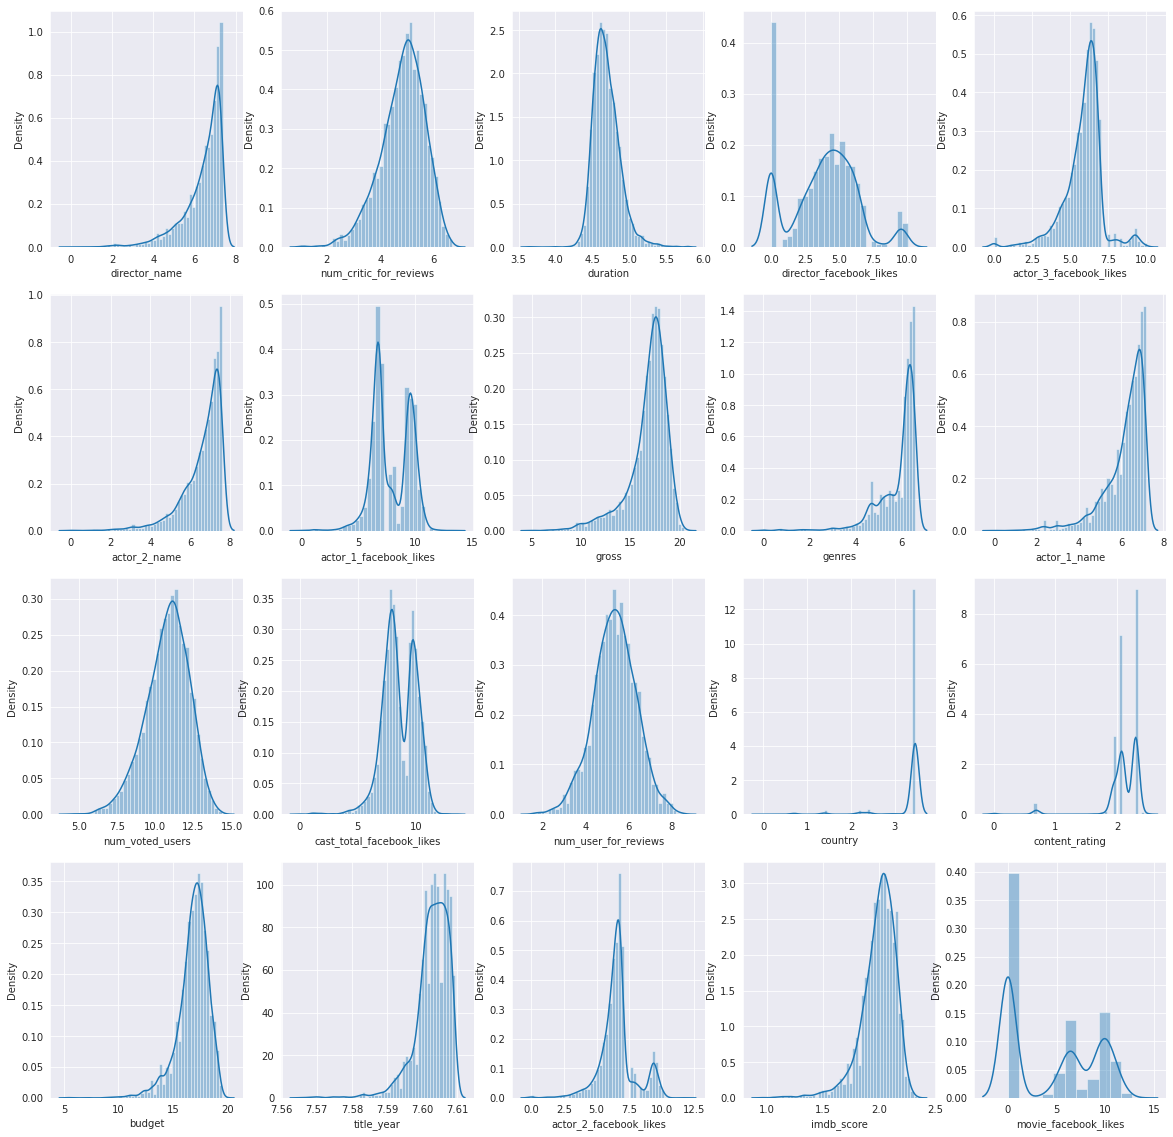

In [124]:
rows=4
cols=5
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,20))
col=eng_dataset.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(eng_dataset[col[index]],ax=ax[i][j])
        index=index+1
        
plt.show()

***Splitting dataset***

In [125]:
X=eng_dataset.drop(labels=['imdb_score'],axis=1)
Y=eng_dataset['imdb_score']
X.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_facebook_likes
0,6.373320,6.584791,5.187386,0.000000,6.752270,6.852243,6.908755,20.449494,4.510860,5.164786,13.694704,8.483636,8.024535,3.465736,2.079442,19.283571,7.605890,6.842683,10.404293
1,6.236370,5.713733,5.135798,6.335054,6.908755,7.313220,10.596660,19.550159,4.442651,6.456770,13.063082,10.786242,7.122060,3.465736,2.079442,19.519293,7.604894,8.517393,0.000000
2,7.189168,6.401917,5.003946,0.000000,5.087596,7.433667,9.305741,19.114199,4.672829,5.468060,12.527681,9.367430,6.902743,3.433987,2.079442,19.316769,7.608871,5.976351,11.350418
3,5.476464,6.701960,5.105945,9.998843,10.043293,5.886104,10.203629,19.920595,5.480639,7.118826,13.950337,11.578339,7.901748,3.465736,2.079442,19.336971,7.607381,10.043293,12.007628
5,4.094345,6.137727,4.890349,6.165418,6.274762,7.455877,6.463029,18.106774,4.653960,5.697093,12.265308,7.535830,6.605298,3.465736,2.079442,19.390323,7.607381,6.450470,10.085851


In [126]:
Y.head()

0    2.186051
1    2.091864
2    2.054124
3    2.251292
5    2.028148
Name: imdb_score, dtype: float64

In [127]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(2878, 19) (720, 19) (2878,) (720,)


***Regression***

*Linear Regression*


In [129]:
lr=LinearRegression()   
lr = lr.fit(X_train,Y_train)
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)
RMSE_test = np.sqrt(mean_squared_error(Y_test, test_pred))
RMSE_train= np.sqrt(mean_squared_error(Y_train,train_pred))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',lr.score(X_train, Y_train))
print('RSquared value on test:',lr.score(X_test, Y_test))

RMSE TrainingData =  0.11788405182619481
RMSE TestData =  0.12836693234808652
--------------------------------------------------
RSquared value on train: 0.4126000493848546
RSquared value on test: 0.38651965029636914


*Calculating Error*

In [131]:
errors = abs(test_pred - Y_test)
mape = 100 * (errors / Y_test)

*Calculating Accuracy*

In [132]:
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.14 %.


***Decision Tree Regressor***

In [133]:
dtr = DecisionTreeRegressor(max_depth=9)
dtr.fit(X_train,Y_train)

train_preds = dtr.predict(X_train)

test_preds = dtr.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:', dtr.score(X_train, Y_train))
print('RSquared value on test:', dtr.score(X_test, Y_test))

RMSE TrainingData =  0.07796314289037518
RMSE TestData =  0.1491374145120677
--------------------------------------------------
RSquared value on train: 0.7430773026476444
RSquared value on test: 0.17192904755572147


*Calculating error*

In [134]:
errors = abs(test_preds - Y_test)

*Calculating Accuracy*

In [136]:
mape = 100 * (errors / Y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 94.77 %.


***Random Forest Regressor***

In [137]:
rfr = RandomForestRegressor().fit(X_train,Y_train)

train_preds1 = rfr.predict(X_train)

test_preds1 = rfr.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:', rfr.score(X_train, Y_train))
print('RSquared value on test:', rfr.score(X_test, Y_test))

RMSE TrainingData =  0.04026463090190752
RMSE TestData =  0.11867435017902074
--------------------------------------------------
RSquared value on train: 0.9314714975991469
RSquared value on test: 0.4756659570942534


*Calculating Error*

In [138]:
errors = abs(test_preds1 - Y_test)

*Calculating Accuracy*

In [139]:
mape = 100 * (errors / Y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.8 %.


***K-Nearest Neighbours***

In [141]:
knn=KNeighborsRegressor()
knn.fit(X_train,Y_train)

train_preds2=knn.predict(X_train)

test_preds2=knn.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds2)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds2)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',knn.score(X_train, Y_train))
print('RSquared value on test:',knn.score(X_test, Y_test))


RMSE TrainingData =  0.10714949162494956
RMSE TestData =  0.1384450142209573
--------------------------------------------------
RSquared value on train: 0.5147070010942967
RSquared value on test: 0.2864096449807122


*Calculating error*

In [142]:
errors = abs(test_preds6 - Y_test)

*Calculating accuracy*

In [143]:
mape = 100 * (errors / Y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.92 %.


***Lasso Regression***

In [144]:
from sklearn.linear_model import LassoCV
lasso_reg = LassoCV(cv=10).fit(X_train, Y_train)

train_preds3=lasso_reg.predict(X_train)
#predicting on test
test_preds3=lasso_reg.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds3)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds3)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',lasso_reg.score(X_train, Y_train))
print('RSquared value on test:',lasso_reg.score(X_test, Y_test))

RMSE TrainingData =  0.11891111721305099
RMSE TestData =  0.12994175317475326
--------------------------------------------------
RSquared value on train: 0.40232001120788985
RSquared value on test: 0.3713748172564435


*Calculating error*

In [145]:
errors = abs(test_preds6 - Y_test)

*Calculating accuracy*

In [146]:
mape = 100 * (errors / Y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.92 %.


***Ridge Regression***

In [147]:
from sklearn.linear_model import RidgeCV
ridge_reg = RidgeCV(cv=10).fit(X_train, Y_train)

train_preds4=ridge_reg.predict(X_train)

test_preds4=ridge_reg.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds4)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds4)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',ridge_reg.score(X_train, Y_train))
print('RSquared value on test:',ridge_reg.score(X_test, Y_test))

RMSE TrainingData =  0.1184549900610333
RMSE TestData =  0.129316852981613
--------------------------------------------------
RSquared value on train: 0.4068964581245702
RSquared value on test: 0.37740649557447525


*Calculating error*

In [148]:
errors = abs(test_preds6 - Y_test)

*Calculating accuracy*

In [149]:
mape = 100 * (errors / Y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.92 %.


***Elastic Net***

In [150]:
from sklearn.linear_model import ElasticNetCV
elastic_net = ElasticNetCV(cv = 10).fit(X_train, Y_train)

train_preds5=elastic_net.predict(X_train)

test_preds5=elastic_net.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds5)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds5)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',elastic_net.score(X_train, Y_train))
print('RSquared value on test:',elastic_net.score(X_test, Y_test))


RMSE TrainingData =  0.11891267543467562
RMSE TestData =  0.1299405512703981
--------------------------------------------------
RSquared value on train: 0.4023043470041213
RSquared value on test: 0.37138644621837735


*Calculating error*

In [151]:
errors = abs(test_preds6 - Y_test)

*Calculating accuracy*

In [152]:
mape = 100 * (errors / Y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.92 %.


***XG-Boost Regressor***

In [153]:
from sklearn.ensemble import GradientBoostingRegressor
xgbr =xgb.XGBRegressor().fit(X_train, Y_train)

train_preds6=xgbr.predict(X_train)

test_preds6=xgbr.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds6)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds6)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',xgbr.score(X_train, Y_train))
print('RSquared value on test:',xgbr.score(X_test, Y_test))

[10:27:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE TrainingData =  0.08836349785695129
RMSE TestData =  0.11601320062955087
--------------------------------------------------
RSquared value on train: 0.6699577080742969
RSquared value on test: 0.49891760109971695


*Calculating error*

In [154]:
errors = abs(test_preds6 - Y_test)

*Calculate Accuracy*

In [155]:
mape = 100 * (errors / Y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.92 %.
